In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# 모델평가_예측모델(체질검사)

In [23]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/체질검사.CSV")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [24]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

In [25]:
# train, test 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [26]:
#회귀모델
lr_model = smf.ols(formula = 'FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST', data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

# Decision
dt_model = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state=1234)
dt_model.fit(df_train_x, df_train_y)


# random 
rf_model = RandomForestRegressor(min_samples_leaf = 6, min_samples_split = 14, max_depth = 4, random_state=1234,
                                n_estimators =100)
rf_model.fit(df_train_x, df_train_y)

# gradient
gb_model = GradientBoostingRegressor(min_samples_leaf = 11, min_samples_split = 22, max_depth = 4, random_state=1234,
                                n_estimators =30, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           4.38e-68
Time:                        10:01:27   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [27]:
models = ['회귀분석', '의사결정나무', '랜덤포레스트',' 그래디언트 부스팅']
mse, rmse, mae, mape = [],[],[],[]

In [28]:
# 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [29]:
# 의사결정나무
# 예측
dt_y_pred =dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [30]:
# 랜덤 포레스트
# 예측
rf_y_pred =rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [31]:
# 그래디언트 부스팅
# 예측
gb_y_pred =gb_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

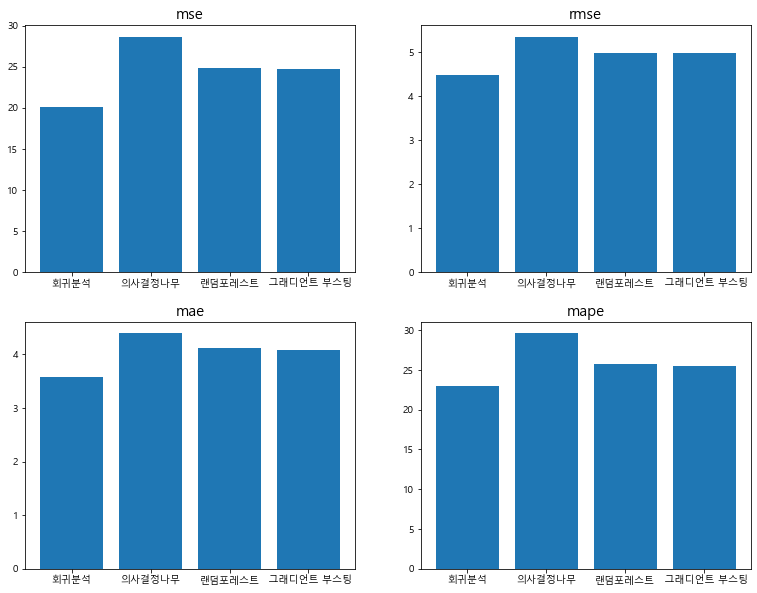

In [32]:
fig, ax = plt.subplots(2, 2, figsize= (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

# 모델평가_예측모델(당뇨병)

In [33]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/DIABETES.CSV")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [34]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y', axis = 1, inplace = False)

In [35]:
# train, test 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [36]:
#회귀모델
lr_model = smf.ols(formula = 'Y ~ AGE + C(GENDER) + BMI +BP + CHOLESTEROL + LDL+  HDL +TCH +LTG +GLUCOSE', data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

# Decision
dt_model = DecisionTreeRegressor(min_samples_leaf = 19, min_samples_split = 22, max_depth = 6, random_state=1234)
dt_model.fit(df_train_x, df_train_y)


# random 
rf_model = RandomForestRegressor(min_samples_leaf = 7, min_samples_split = 14, max_depth = 4, random_state=1234,
                                n_estimators =100)
rf_model.fit(df_train_x, df_train_y)

# gradient
gb_model = GradientBoostingRegressor(min_samples_leaf = 15, min_samples_split = 30, max_depth = 3, random_state=1234,
                                n_estimators =30, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           3.83e-62
Time:                        10:14:13   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -357.4268     67.058     -5.

GradientBoostingRegressor(min_samples_leaf=15, min_samples_split=30,
                          n_estimators=30, random_state=1234)

In [37]:
models = ['회귀분석', '의사결정나무', '랜덤포레스트',' 그래디언트 부스팅']
mse, rmse, mae, mape = [],[],[],[]

In [38]:
# 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [39]:
# 의사결정나무
# 예측
dt_y_pred =dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [40]:
# 랜덤 포레스트
# 예측
rf_y_pred =rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [41]:
# 그래디언트 부스팅
# 예측
gb_y_pred =gb_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

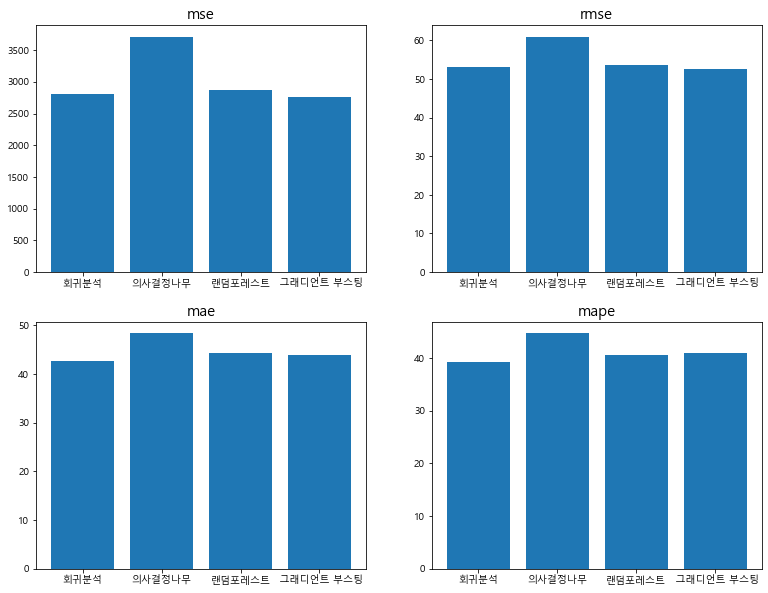

In [42]:
fig, ax = plt.subplots(2, 2, figsize= (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)

# 주성분 분석 연습( 직무능력평가)

In [44]:
from sklearn.decomposition import PCA

# 선형회귀분석 (절편 추가)
import statsmodels.api as sm
matplotlib.rc('font', family = 'Malgun Gothic') 

In [45]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/직무능력평가.CSV")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [46]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['EVAL']
df_raw_x = df_raw.drop('EVAL', axis = 1)
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

In [47]:
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


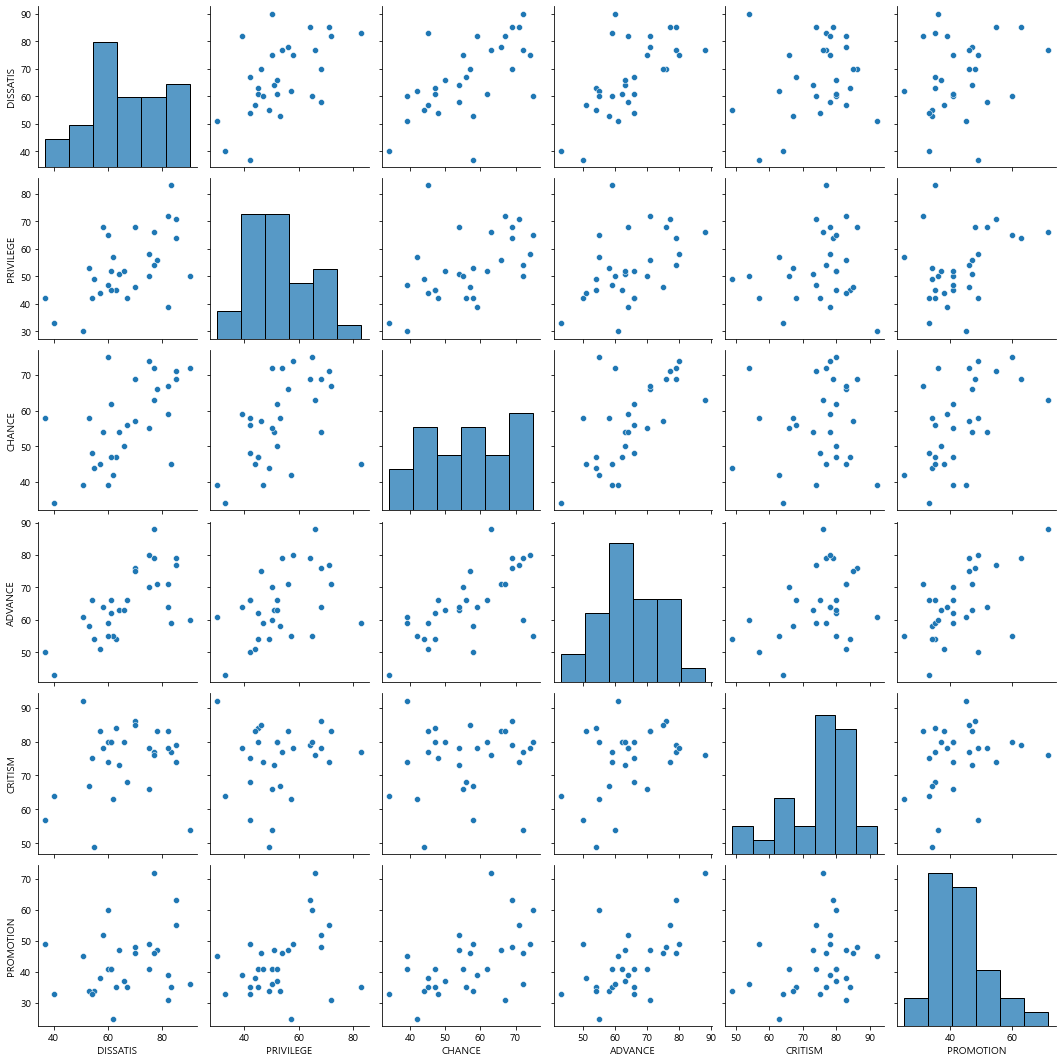

In [48]:
sns.pairplot(df_raw_x)

In [49]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [50]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [52]:
#변수 이름 저장
x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print('Scaled Data : \n {}'.format(nd_scaled[:5].round(3)))
print('Shape:\n{}'.format(nd_scaled.shape))

Scaled Data : 
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
(30, 6)


In [53]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [54]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [55]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)

print('PCA Data : \n {}'.format(nd_pca[:5]))
print('Shape:\n{}'.format(nd_pca.shape))

PCA Data : 
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape:
(30, 6)


In [57]:
df_pca = pd.DataFrame(nd_pca, columns= ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])

df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [58]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo']= [l for l in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


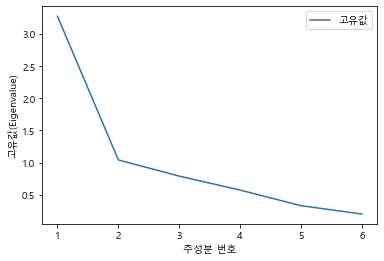

In [59]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')

plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')


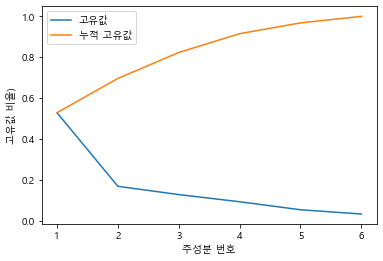

In [60]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = '고유값')

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')

plt.ylabel('고유값 비율)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [62]:
x_cols = pd.DataFrame({'Feature' : df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, 
                            columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


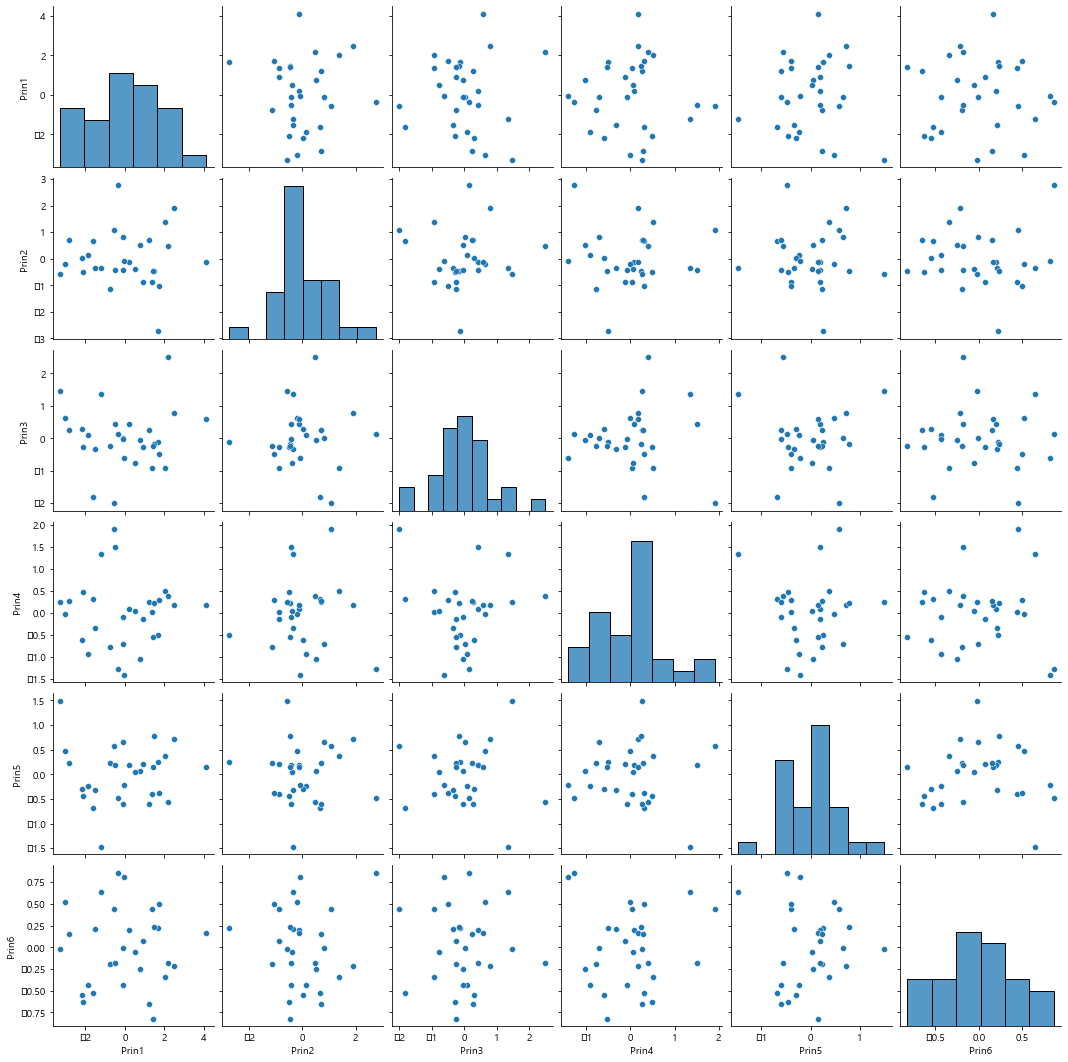

In [63]:
sns.pairplot(df_pca)

In [64]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,0.0,0.0,-0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,0.0
Prin4,-0.0,0.0,0.0,1.0,0.0,0.0
Prin5,0.0,0.0,0.0,0.0,1.0,0.0
Prin6,0.0,-0.0,0.0,0.0,0.0,1.0


In [65]:
# 원래 데이터로 회귀분석
df_raw_x_const = sm.add_constant(df_raw_x)

reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.24e-05
Time:                        14:54:42   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [66]:
# 주성분 점수 데이터로 회귀분석
x_var = ['Prin1','Prin2','Prin3']

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.02e-05
Time:                        14:56:01   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [67]:
# 참조 - scale 변환 데이터로 회귀분석
df_scaled_const = sm.add_constant(df_scaled)

reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           1.24e-05
Time:                        14:57:08   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

# 주성분 분석_실습(IRIS)

In [69]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/IRIS.CSV")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['SPECIES']
df_raw_x = df_raw.drop('SPECIES', axis = 1)
df_raw_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: SPECIES, dtype: object

In [73]:
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


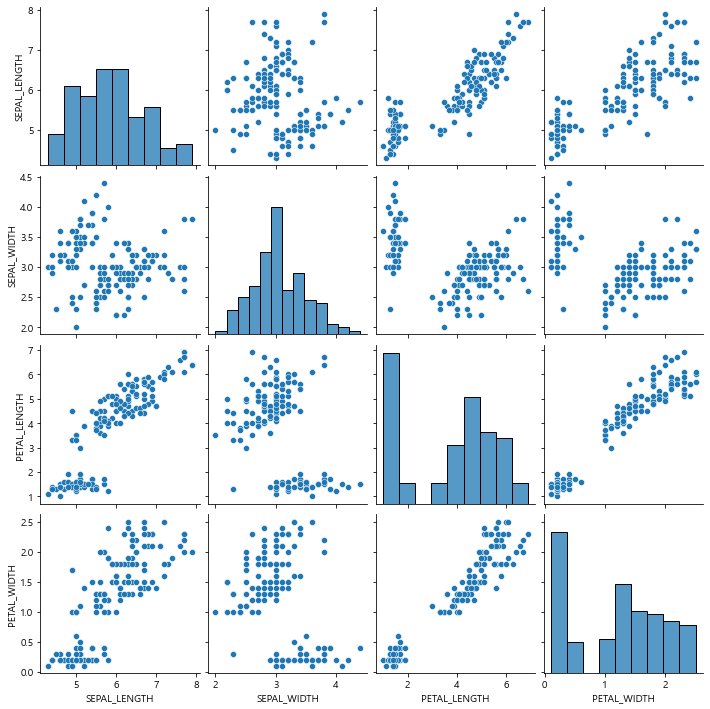

In [74]:
sns.pairplot(df_raw_x)

In [75]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [76]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [77]:
#변수 이름 저장
x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print('Scaled Data : \n {}'.format(nd_scaled[:5].round(3)))
print('Shape:\n{}'.format(nd_scaled.shape))

Scaled Data : 
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape:
(150, 4)


In [78]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [79]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [85]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)

print('PCA Data : \n {}'.format(nd_pca[:5]))
print('Shape:\n{}'.format(nd_pca.shape))

PCA Data : 
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape:
(150, 4)


In [86]:
df_pca = pd.DataFrame(nd_pca, columns= ['Prin1','Prin2','Prin3','Prin4'])

df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [88]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo']= [l for l in range(1,5)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


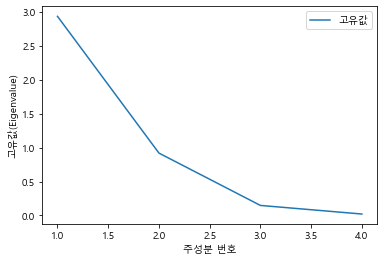

In [89]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')

plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')


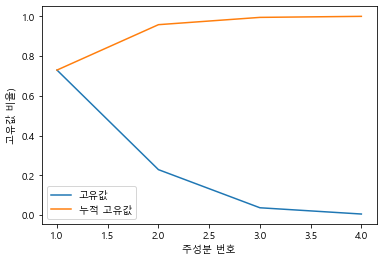

In [90]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = '고유값')

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')

plt.ylabel('고유값 비율)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [91]:
x_cols = pd.DataFrame({'Feature' : df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, 
                            columns=['Prin1','Prin2','Prin3','Prin4'])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


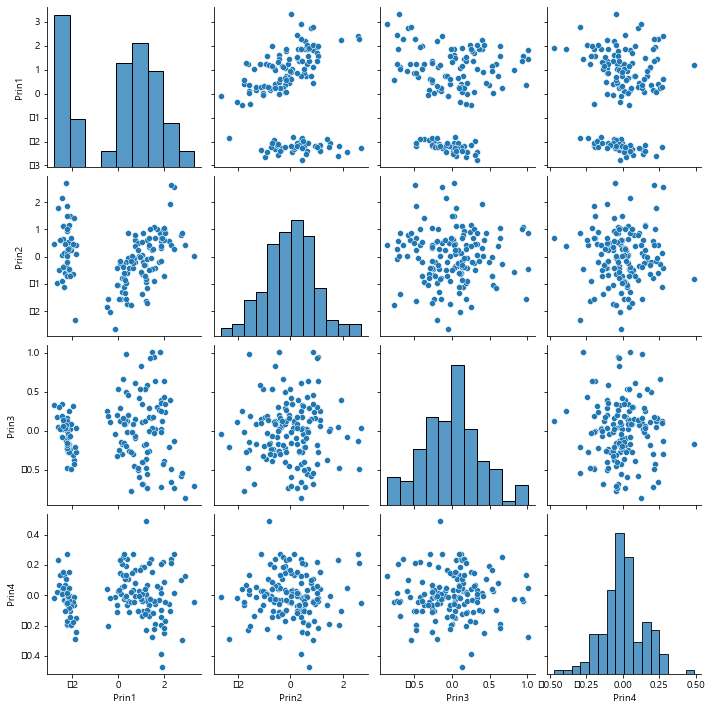

In [92]:
sns.pairplot(df_pca)

In [93]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,-0.0,-0.0,-0.0
Prin2,-0.0,1.0,-0.0,0.0
Prin3,-0.0,-0.0,1.0,0.0
Prin4,-0.0,0.0,0.0,1.0


이는 목표변수가 범주형이므로 회귀분석은 실시하지 않는다.

# 시계열 분석(환율)

In [98]:
# 날짜데이터 생성
from datetime import datetime

# 자기 상관 함수,, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [100]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/환율.CSV",
                    parse_dates= ['APPL_DATE'])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


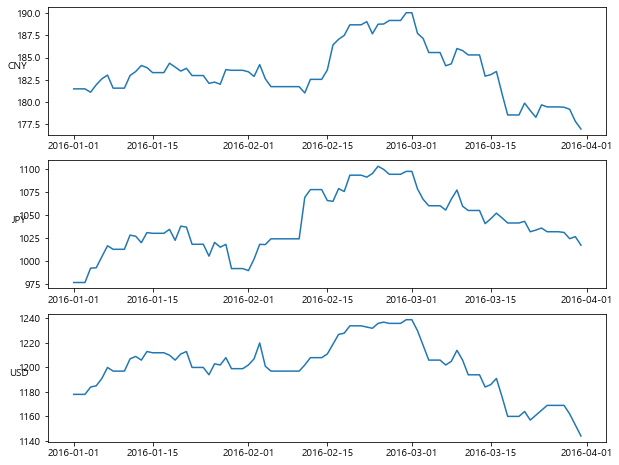

In [104]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows= 3, ncols = 1, figsize=(10,8))

for(ax, idx, currency) in zip([ax1, ax2, ax3], [331, 312, 313], ['CNY','JPY','USD']):
    ax.plot('APPL_DATE','STD_RATE', data = df_raw[df_raw['CURRENCY']==currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 0)

In [105]:
df_CNY = df_raw[df_raw['CURRENCY']=='CNY'].set_index('APPL_DATE')
df_CNY.drop(['CURRENCY', 'USD_CONV_DATE'], axis = 1, inplace = True)

df_JPY = df_raw[df_raw['CURRENCY']=='JPY'].set_index('APPL_DATE')
df_JPY.drop(['CURRENCY', 'USD_CONV_DATE'], axis = 1, inplace = True)

df_UDS = df_raw[df_raw['CURRENCY']=='UDS'].set_index('APPL_DATE')
df_UDS.drop(['CURRENCY', 'USD_CONV_DATE'], axis = 1, inplace = True)

df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [107]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [109]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]
print('shape of train data : {}'.format(df_CNY_train.shape))
print('shape of test data : {}'.format(df_CNY_test.shape))

shape of train data : (82, 1)
shape of test data : (9, 1)


<AxesSubplot:xlabel='APPL_DATE'>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


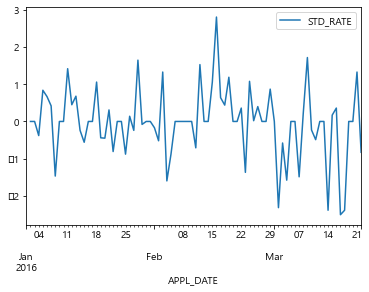

In [110]:
# 1차차분
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

<AxesSubplot:xlabel='APPL_DATE'>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


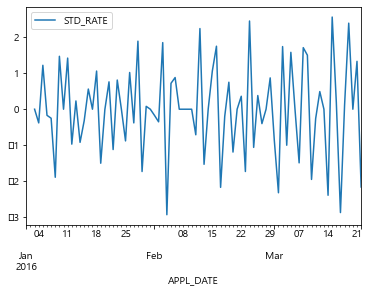

In [111]:
# 2차차분
df_CNY_diff2 = df_CNY_train -2*(df_CNY_train.shift(1)) + (df_CNY_train.shift(2))
df_CNY_diff2.plot()

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


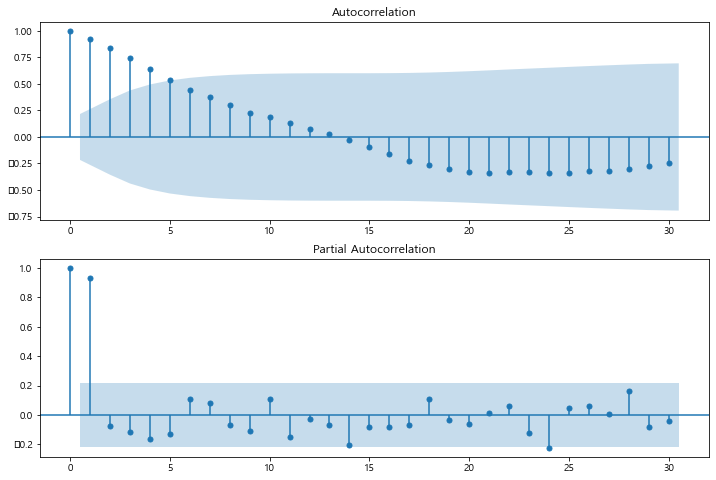

In [112]:
lag_size = 30
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train['STD_RATE'], lags = lag_size, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_CNY_train['STD_RATE'], lags = lag_size, ax = ax2)

In [114]:
ts_model_cny = ARIMA(df_CNY_train, order=(1, 2, 0))

ts_result_cny = ts_model_cny.fit(trend ='c', full_output = True)
print(ts_result_cny.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.512
Method:                       css-mle   S.D. of innovations              1.132
Date:                Wed, 25 Aug 2021   AIC                            253.025
Time:                        17:13:16   BIC                            260.171
Sample:                    01-03-2016   HQIC                           255.890
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0022      0.088     -0.024      0.981      -0.175       0.171
ar.L1.D2.STD_RATE    -0.4389      0.102     -4.322      0.000      -0.638      -0.240
                        

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will 

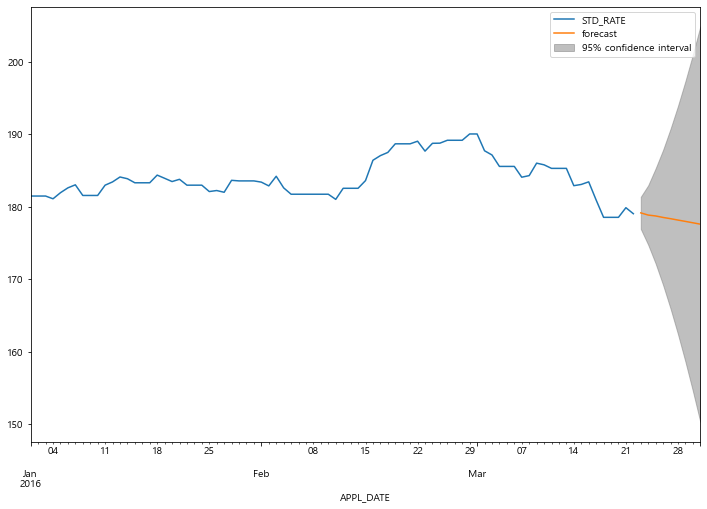

In [115]:
start_time = df_CNY_test.index.min()
end_time = df_CNY_test.index.max()

fig, ax = plt.subplots(figsize = (12, 8))
ax = df_CNY_train.plot(ax = ax)
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax=ax, plot_insample = False)


In [118]:
start_time = pd.to_datetime('2016-01-03')
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_CNY
df_merge['예측값']= y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.477844
2016-01-04,181.10,181.476898
2016-01-05,181.94,180.883667


<AxesSubplot:xlabel='APPL_DATE'>

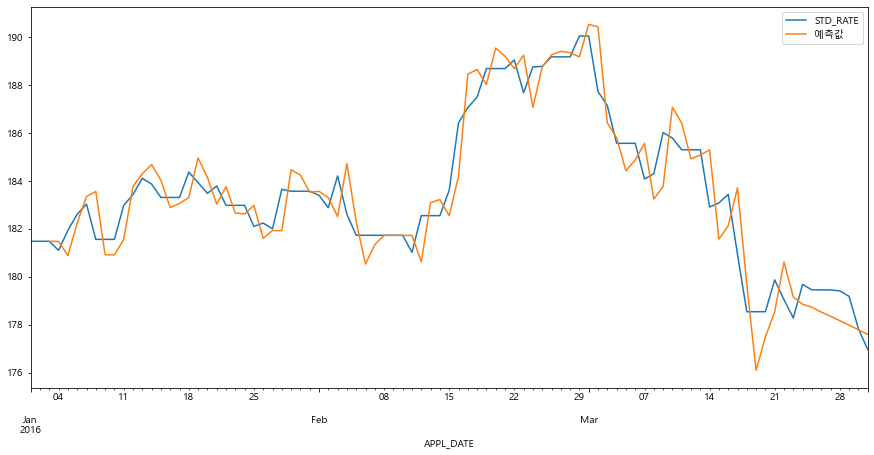

In [120]:
df_merge.plot(y = ['STD_RATE', '예측값'], figsize = (15,7))

# 시계열 분석_실습(미국)

In [127]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/환율.CSV",
                    parse_dates= ['APPL_DATE'])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


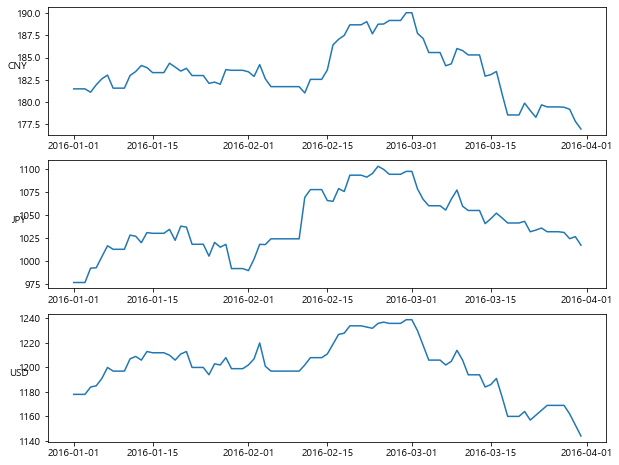

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows= 3, ncols = 1, figsize=(10,8))

for(ax, idx, currency) in zip([ax1, ax2, ax3], [331, 312, 313], ['CNY','JPY','USD']):
    ax.plot('APPL_DATE','STD_RATE', data = df_raw[df_raw['CURRENCY']==currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 0)

In [130]:
df_CNY = df_raw[df_raw['CURRENCY']=='CNY'].set_index('APPL_DATE')
df_CNY.drop(['CURRENCY', 'USD_CONV_DATE'], axis = 1, inplace = True)

df_JPY = df_raw[df_raw['CURRENCY']=='JPY'].set_index('APPL_DATE')
df_JPY.drop(['CURRENCY', 'USD_CONV_DATE'], axis = 1, inplace = True)

df_USD = df_raw[df_raw['CURRENCY']=='USD'].set_index('APPL_DATE')
df_USD.drop(['CURRENCY', 'USD_CONV_DATE'], axis = 1, inplace = True)

df_USD.head()

,STD_RATE
APPL_DATE,
2016-01-01,1178.0
2016-01-02,1178.0
2016-01-03,1178.0
2016-01-04,1184.0
2016-01-05,1185.0


In [131]:
train_size = 0.9
len_idx = len(df_USD.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [132]:
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]
print('shape of train data : {}'.format(df_USD_train.shape))
print('shape of test data : {}'.format(df_USD_test.shape))

shape of train data : (82, 1)
shape of test data : (9, 1)


<AxesSubplot:xlabel='APPL_DATE'>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


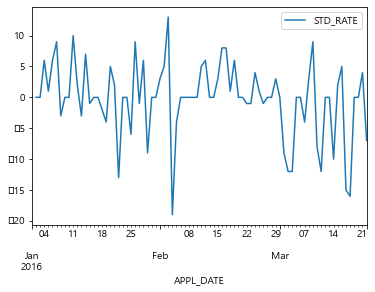

In [134]:
# 1차차분
df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

<AxesSubplot:xlabel='APPL_DATE'>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


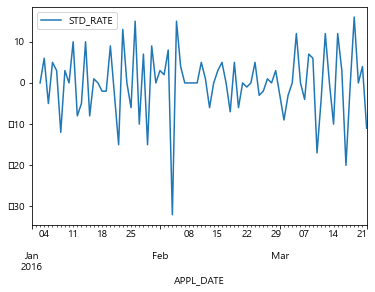

In [135]:
# 2차차분
df_USD_diff2 = df_USD_train -2*(df_USD_train.shift(1)) + (df_USD_train.shift(2))
df_USD_diff2.plot()

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


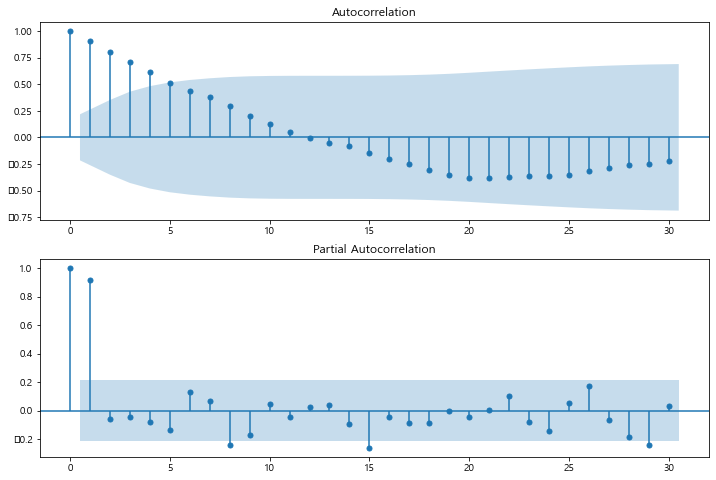

In [143]:
lag_size = 30
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df_USD_train['STD_RATE'], lags = lag_size, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df_USD_train['STD_RATE'], lags = lag_size, ax = ax2)

In [144]:
ts_model_usd = ARIMA(df_USD_train, order=(1, 2, 0))

ts_result_usd = ts_model_usd.fit(trend ='c', full_output = True)
print(ts_result_usd.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.STD_RATE   No. Observations:                   80
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.800
Method:                       css-mle   S.D. of innovations              7.502
Date:                Wed, 25 Aug 2021   AIC                            555.601
Time:                        17:50:01   BIC                            562.747
Sample:                    01-03-2016   HQIC                           558.466
                         - 03-22-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0502      0.612     -0.082      0.935      -1.249       1.148
ar.L1.D2.STD_RATE    -0.3763      0.104     -3.622      0.000      -0.580      -0.173
                        

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will 

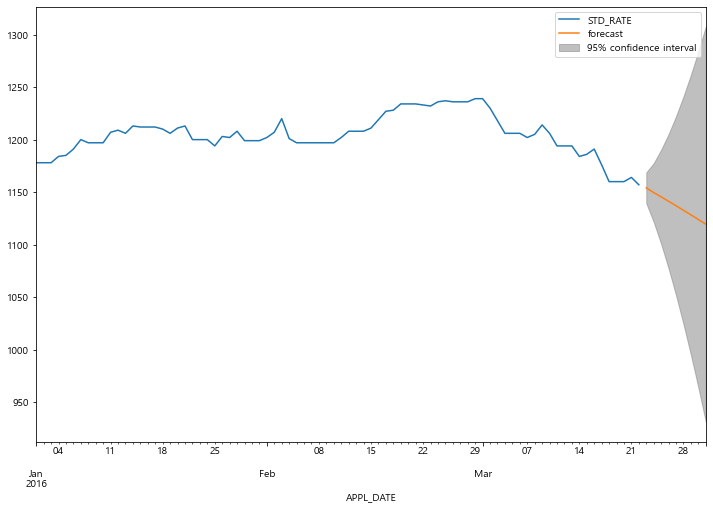

In [146]:
start_time = df_USD_test.index.min()
end_time = df_USD_test.index.max()

fig, ax = plt.subplots(figsize = (12, 8))
ax = df_USD_train.plot(ax = ax)
fig = ts_result_usd.plot_predict(start = start_time, end = end_time, ax=ax, plot_insample = False)


In [147]:
start_time = pd.to_datetime('2016-01-03')
y_pred = ts_result_usd.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_USD
df_merge['예측값']= y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1177.949755
2016-01-04,1184.0,1177.930847
2016-01-05,1185.0,1187.672883


<AxesSubplot:xlabel='APPL_DATE'>

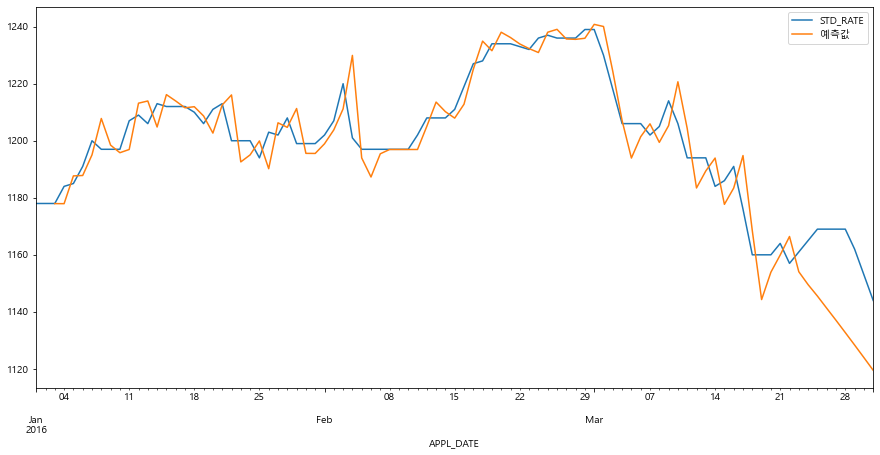

In [148]:
df_merge.plot(y = ['STD_RATE', '예측값'], figsize = (15,7))